# MNIST Classification - Five Layer NN

In [86]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data as mnist_data
import numpy as np
from matplotlib import pyplot as plt
import math
tf.set_random_seed(0)

In [87]:
# download train and test data (28x28 images of handwritten digits)
mnist = mnist_data.read_data_sets("data", one_hot=True, reshape=False, validation_size=0)

Extracting data\train-images-idx3-ubyte.gz
Extracting data\train-labels-idx1-ubyte.gz
Extracting data\t10k-images-idx3-ubyte.gz
Extracting data\t10k-labels-idx1-ubyte.gz


In [88]:
# input X: 28x28 grayscale images, the first dimension (None) will index the images in the mini-batch
X = tf.placeholder(tf.float32, [None, 28, 28, 1])

# correct answers will go here
Y_ = tf.placeholder(tf.float32, [None, 10])

# learning rate
lr = tf.placeholder(tf.float32)

pkeep = tf.placeholder(tf.float32)

# weights
W1 = tf.Variable(tf.truncated_normal([784, 200], stddev=0.1))
W2 = tf.Variable(tf.truncated_normal([200, 100], stddev=0.1))
W3 = tf.Variable(tf.truncated_normal([100, 60], stddev=0.1))
W4 = tf.Variable(tf.truncated_normal([60, 30], stddev=0.1))
W5 = tf.Variable(tf.truncated_normal([30, 10], stddev=0.1))

# biases
b1 = tf.Variable(tf.ones([200])/10)
b2 = tf.Variable(tf.ones([100])/10)
b3 = tf.Variable(tf.ones([60])/10)
b4 = tf.Variable(tf.ones([30])/10)
b5 = tf.Variable(tf.ones([10])/10)

In [89]:
# flatten the images into a single line of pixels
# -1 in the shape definition means "the only possible dimension that will preserve the number of elements"
XX = tf.reshape(X, [-1, 784])

In [90]:
# The model
Y1 = tf.nn.relu(tf.matmul(XX, W1) + b1)

Y1d = tf.nn.dropout(Y1, pkeep)

Y2 = tf.nn.relu(tf.matmul(Y1d, W2) + b2)

Y2d = tf.nn.dropout(Y2, pkeep)

Y3 = tf.nn.relu(tf.matmul(Y2d, W3) + b3)

Y3d = tf.nn.dropout(Y3, pkeep)

Y4 = tf.nn.relu(tf.matmul(Y3d, W4) + b4)

Y4d = tf.nn.dropout(Y4, pkeep)

Z = tf.matmul(Y4d, W5) + b5
Y = tf.nn.softmax(Z)

In [91]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=Z, labels=Y_)
cross_entropy = tf.reduce_mean(cross_entropy)*100

In [92]:
# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [93]:
# to keep track of max accuracy
max_accuracy = 0.0

In [94]:
train_step = tf.train.AdamOptimizer(lr).minimize(cross_entropy)

In [95]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

train_loss_log = []
test_loss_log = []
train_accuracy_log = []
test_accuracy_log = []

In [96]:
def training_step(i):

    global max_accuracy
    # training on batches of 100 images with 100 labels
    batch_X, batch_Y = mnist.train.next_batch(100)
    
    # learning rate decay
    max_learning_rate = 0.003
    min_learning_rate = 0.0001
    decay_speed = 2000.0
    learning_rate = min_learning_rate + (max_learning_rate - min_learning_rate) * math.exp(-i/decay_speed)

    # compute training values
    if (i % 10 == 0):
        a, c = sess.run([accuracy, cross_entropy], feed_dict={X: batch_X, Y_: batch_Y, pkeep: 1.0})
        train_accuracy_log.append([i,a])
        train_loss_log.append([i,c])        
        print(str(i) + ": accuracy:" + str(a) + " loss: " + str(c))

    # compute test values
    if (i % 50 == 0):
        a, c = sess.run([accuracy, cross_entropy], feed_dict={X: mnist.test.images, Y_: mnist.test.labels, pkeep: 1.0})
        test_accuracy_log.append([i,a])
        test_loss_log.append([i,c])  
        if (a > max_accuracy):
            max_accuracy = a

        print(str(i) + ": $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:" + str(a) + " test loss: " + str(c))

    # the backpropagation training step
    sess.run(train_step, feed_dict={X: batch_X, Y_: batch_Y, lr: learning_rate, pkeep: 0.75})

In [97]:
# run this thang
for i in range(10000+1): 
    training_step(i)

0: accuracy:0.1 loss: 228.74582
0: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.0819 test loss: 230.29646
10: accuracy:0.34 loss: 182.17368
20: accuracy:0.62 loss: 117.69767
30: accuracy:0.69 loss: 87.77194
40: accuracy:0.78 loss: 75.31436
50: accuracy:0.82 loss: 56.342262
50: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.8112 test loss: 58.556046
60: accuracy:0.86 loss: 54.07077
70: accuracy:0.86 loss: 50.23601
80: accuracy:0.83 loss: 41.63963
90: accuracy:0.91 loss: 43.351185
100: accuracy:0.95 loss: 19.478203
100: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9042 test loss: 34.078934
110: accuracy:0.88 loss: 49.754326
120: accuracy:0.86 loss: 55.765457
130: accuracy:0.95 loss: 19.098566
140: accuracy:0.92 loss: 27.65159
150: accuracy:0.91 loss: 33.783432
150: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.915 test loss: 29.182608
160: accuracy:0.9 loss: 29.234856
170: accuracy:0.92 loss: 33.2552
180: accuracy:0.88 loss: 48.89068
190: accuracy:0.9 loss: 35.060284
200: accuracy:0.92 loss: 37.536095
200:

1700: accuracy:0.97 loss: 15.857138
1700: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9727 test loss: 10.165576
1710: accuracy:0.98 loss: 9.442337
1720: accuracy:0.99 loss: 5.4928937
1730: accuracy:0.98 loss: 5.6022367
1740: accuracy:0.98 loss: 8.725527
1750: accuracy:0.98 loss: 4.3062754
1750: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.971 test loss: 10.464695
1760: accuracy:0.98 loss: 8.998117
1770: accuracy:0.98 loss: 7.688838
1780: accuracy:0.97 loss: 9.036262
1790: accuracy:0.98 loss: 8.508554
1800: accuracy:0.99 loss: 4.8740063
1800: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9705 test loss: 10.226844
1810: accuracy:0.98 loss: 4.9793544
1820: accuracy:1.0 loss: 1.2761613
1830: accuracy:1.0 loss: 0.9273529
1840: accuracy:0.97 loss: 4.4491973
1850: accuracy:0.98 loss: 8.417002
1850: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9725 test loss: 10.658388
1860: accuracy:0.99 loss: 3.1305377
1870: accuracy:0.98 loss: 3.2839336
1880: accuracy:0.97 loss: 9.544762
1890: accuracy:0.96 loss: 12.267477

3350: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9787 test loss: 8.726517
3360: accuracy:1.0 loss: 0.22321646
3370: accuracy:0.98 loss: 4.447815
3380: accuracy:0.98 loss: 11.554255
3390: accuracy:0.98 loss: 7.91217
3400: accuracy:0.97 loss: 19.50689
3400: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9785 test loss: 8.626073
3410: accuracy:0.98 loss: 7.2598166
3420: accuracy:1.0 loss: 0.38268688
3430: accuracy:1.0 loss: 2.707297
3440: accuracy:1.0 loss: 0.7111847
3450: accuracy:0.99 loss: 1.5295014
3450: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9787 test loss: 8.464355
3460: accuracy:0.99 loss: 6.383231
3470: accuracy:0.99 loss: 2.4884443
3480: accuracy:0.98 loss: 8.107806
3490: accuracy:0.98 loss: 7.1357975
3500: accuracy:0.99 loss: 2.7039871
3500: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9787 test loss: 8.579336
3510: accuracy:0.98 loss: 4.189891
3520: accuracy:1.0 loss: 0.42525092
3530: accuracy:0.99 loss: 1.5958307
3540: accuracy:0.98 loss: 6.189677
3550: accuracy:0.99 loss: 3.6363428
355

5030: accuracy:0.98 loss: 2.9400342
5040: accuracy:0.98 loss: 5.887769
5050: accuracy:0.99 loss: 4.742011
5050: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9796 test loss: 8.455256
5060: accuracy:0.99 loss: 8.930959
5070: accuracy:0.96 loss: 10.841951
5080: accuracy:0.98 loss: 4.8275766
5090: accuracy:0.99 loss: 4.3195953
5100: accuracy:1.0 loss: 0.88023
5100: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.98 test loss: 8.218369
5110: accuracy:0.99 loss: 2.5460017
5120: accuracy:0.98 loss: 3.3357728
5130: accuracy:0.99 loss: 2.9900563
5140: accuracy:0.99 loss: 4.906312
5150: accuracy:0.99 loss: 2.5936904
5150: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9798 test loss: 8.140583
5160: accuracy:0.99 loss: 6.641735
5170: accuracy:0.98 loss: 9.619313
5180: accuracy:1.0 loss: 0.53195405
5190: accuracy:0.98 loss: 3.3401077
5200: accuracy:0.99 loss: 2.9641895
5200: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.981 test loss: 8.089559
5210: accuracy:0.98 loss: 4.682762
5220: accuracy:0.99 loss: 3.1831832
5230:

6680: accuracy:0.99 loss: 3.6808836
6690: accuracy:1.0 loss: 0.19812693
6700: accuracy:0.98 loss: 6.1032047
6700: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9799 test loss: 8.409203
6710: accuracy:1.0 loss: 0.43234086
6720: accuracy:1.0 loss: 0.15775049
6730: accuracy:1.0 loss: 1.164556
6740: accuracy:0.99 loss: 1.3850274
6750: accuracy:1.0 loss: 0.37767273
6750: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9797 test loss: 8.496258
6760: accuracy:1.0 loss: 0.43873334
6770: accuracy:1.0 loss: 0.17297551
6780: accuracy:1.0 loss: 0.09785717
6790: accuracy:1.0 loss: 0.6155559
6800: accuracy:1.0 loss: 1.5633096
6800: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9793 test loss: 8.6062355
6810: accuracy:1.0 loss: 0.15293105
6820: accuracy:1.0 loss: 0.8372191
6830: accuracy:1.0 loss: 0.52543116
6840: accuracy:0.99 loss: 3.784351
6850: accuracy:1.0 loss: 1.9899838
6850: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9806 test loss: 8.516313
6860: accuracy:1.0 loss: 0.05675194
6870: accuracy:1.0 loss: 0.8991948

8330: accuracy:0.99 loss: 3.9110444
8340: accuracy:0.98 loss: 3.4407191
8350: accuracy:0.98 loss: 8.745954
8350: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9809 test loss: 8.441756
8360: accuracy:0.99 loss: 1.5084091
8370: accuracy:1.0 loss: 0.48320958
8380: accuracy:0.98 loss: 4.6096835
8390: accuracy:1.0 loss: 0.8479124
8400: accuracy:1.0 loss: 0.18521978
8400: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9806 test loss: 8.389109
8410: accuracy:0.99 loss: 1.5437005
8420: accuracy:0.99 loss: 4.297974
8430: accuracy:1.0 loss: 0.77621186
8440: accuracy:1.0 loss: 1.4839379
8450: accuracy:1.0 loss: 0.3252066
8450: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9816 test loss: 8.400338
8460: accuracy:1.0 loss: 1.2937005
8470: accuracy:1.0 loss: 0.36814147
8480: accuracy:1.0 loss: 0.3313819
8490: accuracy:1.0 loss: 0.5811957
8500: accuracy:1.0 loss: 0.770718
8500: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9809 test loss: 8.471565
8510: accuracy:1.0 loss: 1.6361095
8520: accuracy:1.0 loss: 0.2489686
8530

10000: accuracy:0.99 loss: 1.6638103
10000: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9822 test loss: 8.283499


In [99]:
print("max test accuracy: " + str(max_accuracy))

max test accuracy: 0.9824


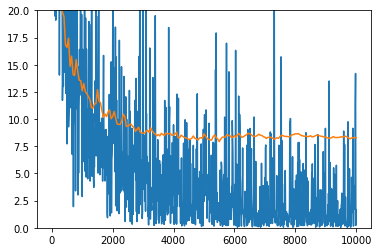

In [100]:
train_loss_log = np.array(train_loss_log)
test_loss_log = np.array(test_loss_log)

plt.plot(train_loss_log[:,0],train_loss_log[:,1])
plt.plot(test_loss_log[:,0],test_loss_log[:,1])
plt.ylim(top=20, bottom=0)
plt.show()

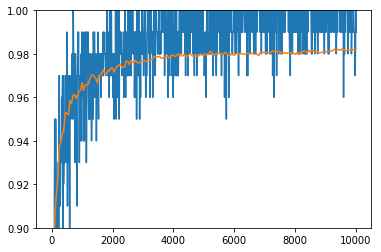

In [101]:
train_accuracy_log = np.array(train_accuracy_log)
test_accuracy_log = np.array(test_accuracy_log)

plt.plot(train_accuracy_log[:,0],train_accuracy_log[:,1])
plt.plot(test_accuracy_log[:,0],test_accuracy_log[:,1])
plt.ylim(top = 1, bottom=.9)
plt.show()